In [1]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.image as mpimg

In [2]:
dataset_path = "D:/Acadamics and University/Python/Intelligent Systems/Project 2/Welding Dataset/"

In [3]:
# class counts from labels 
def get_class_counts(label_folder):
    class_counts = Counter()
    
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):  
            label_file_path = os.path.join(label_folder, label_file)
            with open(label_file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()  
                    if len(parts) > 0:
                        # The first part is the class ID
                        class_id = int(parts[0])
                        # Map class ID to the actual class name
                        if class_id == 0:
                            class_name = 'bad weld'
                        elif class_id == 1:
                            class_name = 'good weld'
                        elif class_id == 2:
                            class_name = 'defect'
                        else:
                            continue  # Skip if the class ID is unknown
                        
                        class_counts[class_name] += 1
    return class_counts


In [4]:
# analyze the dataset
def analyze_dataset(base_folder):
    total_counts = Counter()
    class_names = ['good weld', 'bad weld', 'defect']

    split_counts = {}
    for split in ['train', 'test', 'valid']:
        label_folder = os.path.join(base_folder, split, 'labels')
        split_counts[split] = get_class_counts(label_folder)
        total_counts.update(split_counts[split])

    # Print the total counts and percentage distribution
    total_labels = sum(total_counts.values())
    print(f"\nTotal counts: {total_counts}")
    
    for class_name in class_names:
        count = total_counts.get(class_name, 0)
        percentage = (count / total_labels) * 100 if total_labels > 0 else 0
        print(f"{class_name}: {count} samples ({percentage:.2f}%)")
    
    # Plotting the distribution
    plot_class_distribution(total_counts)
    plot_split_distribution(split_counts)
    plot_class_percentage(total_counts)
    plot_split_percentage(split_counts)


In [5]:
# plot the class distribution (Bar plot)
def plot_class_distribution(total_counts):
    class_names = ['good weld', 'bad weld', 'defect']
    counts = [total_counts.get(class_name, 0) for class_name in class_names]
    
    plt.figure(figsize=(8, 6))
    plt.bar(class_names, counts, color=['green', 'red', 'blue'])
    plt.title('Class Distribution in Dataset')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [6]:
# plot the class percentage distribution (Pie chart)
def plot_class_percentage(total_counts):
    class_names = ['good weld', 'bad weld', 'defect']
    counts = [total_counts.get(class_name, 0) for class_name in class_names]
    
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
    plt.title('Class Percentage Distribution')
    plt.tight_layout()
    plt.show()


In [7]:
# plot the distribution per split (train, test, valid) - Bar plot
def plot_split_distribution(split_counts):
    splits = ['train', 'test', 'valid']
    class_names = ['good weld', 'bad weld', 'defect']
    
    split_data = {split: [split_counts[split].get(class_name, 0) for class_name in class_names] for split in splits}
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    index = range(len(splits))

    for i, class_name in enumerate(class_names):
        ax.bar([x + i * bar_width for x in index], [split_data[split][i] for split in splits], bar_width, label=class_name)

    ax.set_xlabel('Data Split')
    ax.set_ylabel('Count')
    ax.set_title('Class Distribution per Data Split (train, test, valid)')
    ax.set_xticks([x + bar_width for x in index])
    ax.set_xticklabels(splits)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [8]:
# plot the percentage distribution per split (Pie charts)
def plot_split_percentage(split_counts):
    splits = ['train', 'test', 'valid']
    class_names = ['good weld', 'bad weld', 'defect']
    
    for split in splits:
        counts = [split_counts[split].get(class_name, 0) for class_name in class_names]
        total = sum(counts)
        
        plt.figure(figsize=(8, 8))
        plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
        plt.title(f'{split.capitalize()} Split Percentage Distribution')
        plt.tight_layout()
        plt.show()


In [9]:
#  count the number of images in each subset
def count_images_in_subsets(base_folder):
    subsets = ['train', 'test', 'valid']
    image_counts = {}
    
    for subset in subsets:
        image_folder = os.path.join(base_folder, subset, 'images')
        image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]  # Adjust for image formats
        image_counts[subset] = len(image_files)
    
    return image_counts


In [10]:
#  plot the number of images in each subset and their percentage
def plot_image_distribution(base_folder):
    # Get the image counts in each subset (train, test, valid)
    image_counts = count_images_in_subsets(base_folder)
    
    total_images = sum(image_counts.values())
    
    plt.figure(figsize=(8, 6))
    plt.bar(image_counts.keys(), image_counts.values(), color=['green', 'red', 'blue'])
    plt.title('Number of Images in Each Subset (train, test, valid)')
    plt.xlabel('Subset')
    plt.ylabel('Number of Images')
    plt.tight_layout()
    plt.show()
    
    percentages = [count / total_images * 100 for count in image_counts.values()]
    
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=image_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
    plt.title('Percentage of Images in Each Subset (train, test, valid)')
    plt.tight_layout()
    plt.show()


In [11]:
#  bounding box distributions and image resolutions
def plot_bbox_distribution(label_folder):
    bbox_sizes = []
    
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            label_file_path = os.path.join(label_folder, label_file)
            with open(label_file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 4: 
                        x_center, y_center, width, height = map(float, parts[1:5])
                        bbox_sizes.append((width, height))
    
    widths, heights = zip(*bbox_sizes)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(widths, heights, alpha=0.5)
    ax.set_xlabel('Bounding Box Width')
    ax.set_ylabel('Bounding Box Height')
    ax.set_title('Bounding Box Distribution (Width vs Height)')
    plt.tight_layout()
    plt.show()


In [12]:
# Plot image size distribution

def plot_image_size_distribution(image_folder):
    image_sizes = []
    
    for image_file in os.listdir(image_folder):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):  # Adjust for your image formats
            image_path = os.path.join(image_folder, image_file)
            img = mpimg.imread(image_path)
            image_sizes.append(img.shape[:2])  # Get (height, width)
    
    heights, widths = zip(*image_sizes)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(widths, heights, alpha=0.5)
    ax.set_xlabel('Image Width')
    ax.set_ylabel('Image Height')
    ax.set_title('Image Size Distribution (Width vs Height)')
    plt.tight_layout()
    plt.show()


In [13]:
# Plot class-wise bounding box size distribution
def plot_classwise_bbox_size_distribution(label_folder):
    class_bbox_sizes = {'good weld': [], 'bad weld': [], 'defect': []}
    
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            label_file_path = os.path.join(label_folder, label_file)
            with open(label_file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 4:  
                        class_id = int(parts[0])  # First part is class ID
                        x_center, y_center, width, height = map(float, parts[1:5])
                        if class_id == 0:
                            class_bbox_sizes['bad weld'].append((width, height))
                        elif class_id == 1:
                            class_bbox_sizes['good weld'].append((width, height))
                        elif class_id == 2:
                            class_bbox_sizes['defect'].append((width, height))
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for class_name, bbox_sizes in class_bbox_sizes.items():
        widths, heights = zip(*bbox_sizes)
        ax.scatter(widths, heights, alpha=0.5, label=class_name)
    
    ax.set_xlabel('Bounding Box Width')
    ax.set_ylabel('Bounding Box Height')
    ax.set_title('Class-wise Distribution of Object Sizes (Bounding Boxes)')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [13]:
def plot_classwise_bbox_size_distribution(label_folder):
    class_bbox_sizes = {'good weld': [], 'bad weld': [], 'defect': []}
    
    # Parse label files and collect bounding box sizes
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            label_file_path = os.path.join(label_folder, label_file)
            with open(label_file_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 4:  # Ensure line has sufficient parts
                        class_id = int(parts[0])  # First part is class ID
                        x_center, y_center, width, height = map(float, parts[1:5])
                        if class_id == 0:
                            class_bbox_sizes['bad weld'].append((width, height))
                        elif class_id == 1:
                            class_bbox_sizes['good weld'].append((width, height))
                        elif class_id == 2:
                            class_bbox_sizes['defect'].append((width, height))

    # Plot individual scatter plots for each class
    for class_name, bbox_sizes in class_bbox_sizes.items():
        if bbox_sizes:  # Ensure there are bounding boxes to plot
            widths, heights = zip(*bbox_sizes)
            plt.figure(figsize=(8, 6))
            plt.scatter(widths, heights, alpha=0.5, label=class_name, c='blue')
            plt.xlabel('Bounding Box Width')
            plt.ylabel('Bounding Box Height')
            plt.title(f'Distribution of Object Sizes - {class_name}')
            plt.legend()
            plt.tight_layout()
            plt.show()

In [14]:
# Plot correlation of class vs image resolution

def plot_class_vs_image_quality(image_folder, label_folder):
    class_image_sizes = {'good weld': [], 'bad weld': [], 'defect': []}
    
    for label_file in os.listdir(label_folder):
        if label_file.endswith('.txt'):
            label_file_path = os.path.join(label_folder, label_file)
            with open(label_file_path, 'r') as f:
                lines = f.readlines()
                image_file_name = label_file.replace('.txt', '.jpg')  
                image_path = os.path.join(image_folder, image_file_name)
                img = mpimg.imread(image_path)
                image_width, image_height = img.shape[1], img.shape[0]
                
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) > 0:
                        class_id = int(parts[0])  
                        if class_id == 0:
                            class_image_sizes['bad weld'].append((image_width, image_height))
                        elif class_id == 1:
                            class_image_sizes['good weld'].append((image_width, image_height))
                        elif class_id == 2:
                            class_image_sizes['defect'].append((image_width, image_height))
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for class_name, image_sizes in class_image_sizes.items():
        widths, heights = zip(*image_sizes)
        ax.scatter(widths, heights, alpha=0.5, label=class_name)
    
    ax.set_xlabel('Image Width')
    ax.set_ylabel('Image Height')
    ax.set_title('Correlation Between Classes and Image Quality (Resolution)')
    ax.legend()
    plt.tight_layout()
    plt.show()



Total counts: Counter({'good weld': 2348, 'defect': 1960, 'bad weld': 1378})
good weld: 2348 samples (41.29%)
bad weld: 1378 samples (24.23%)
defect: 1960 samples (34.47%)


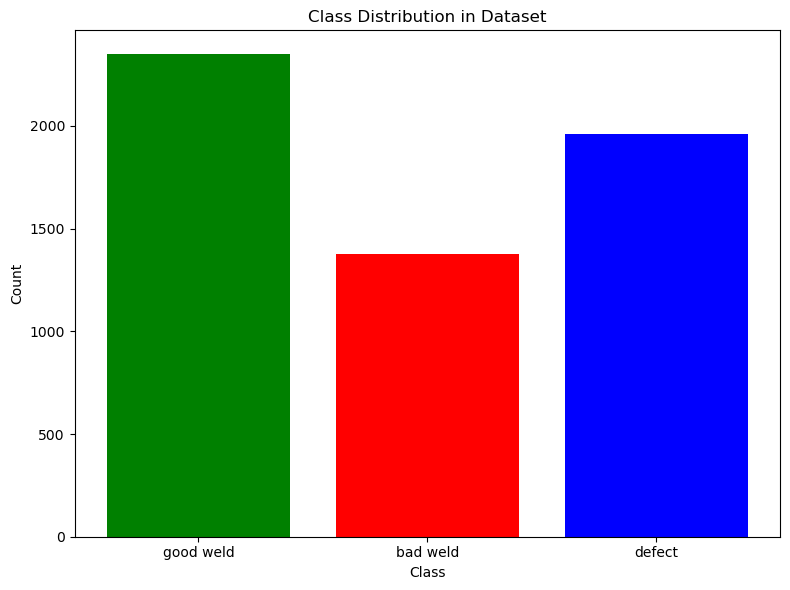

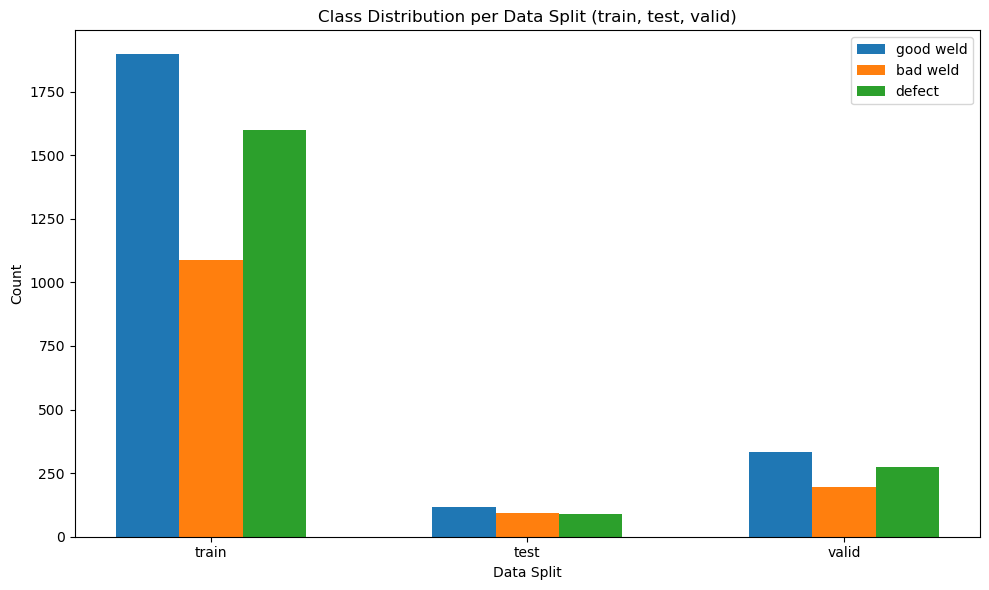

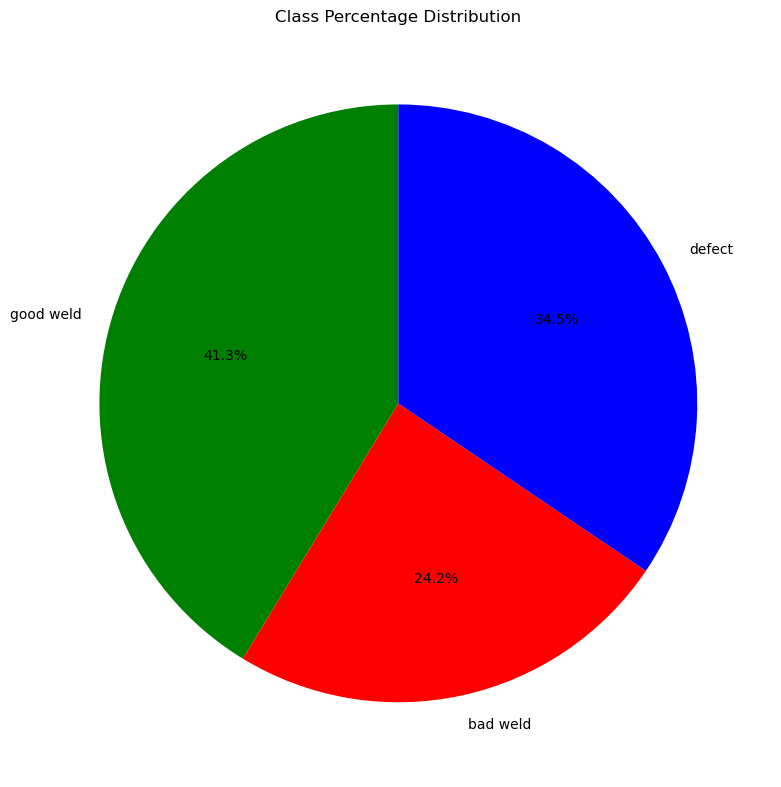

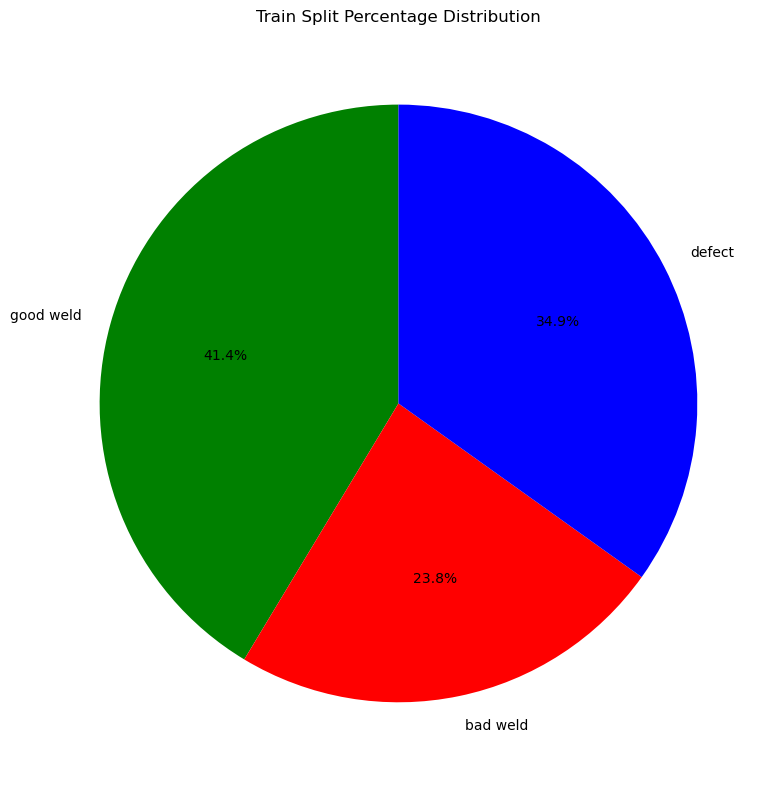

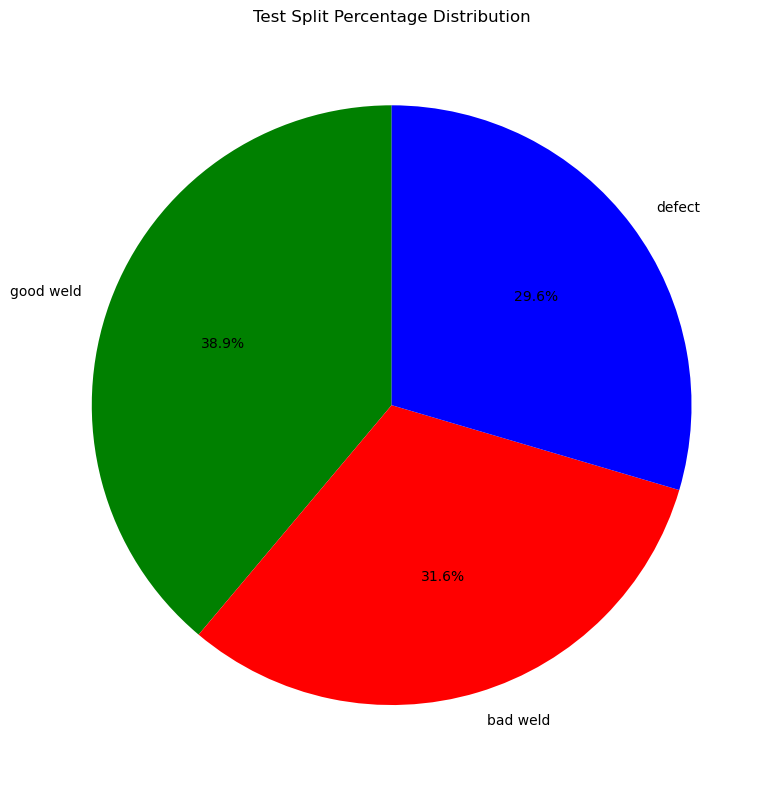

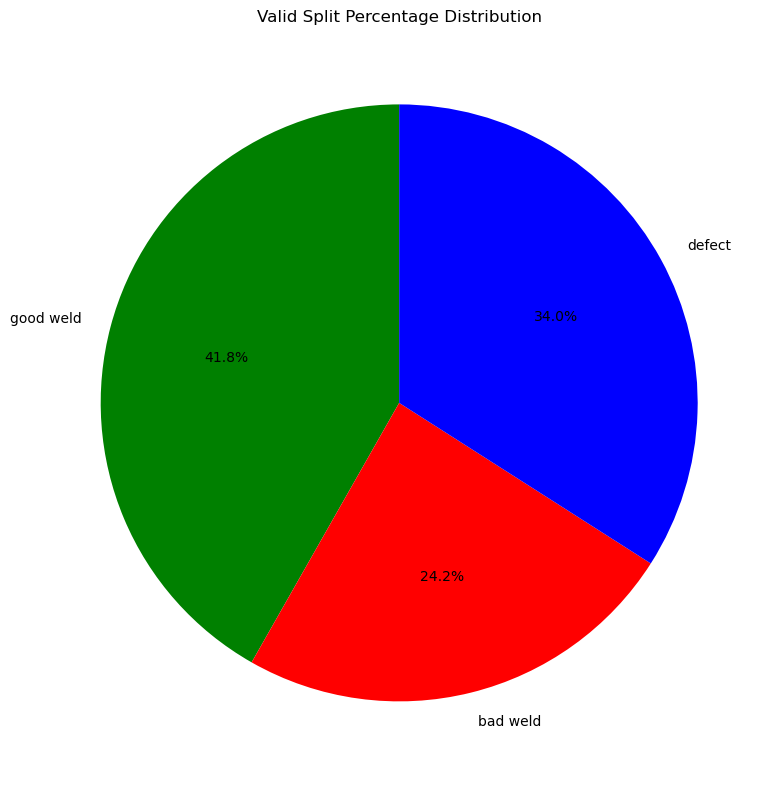

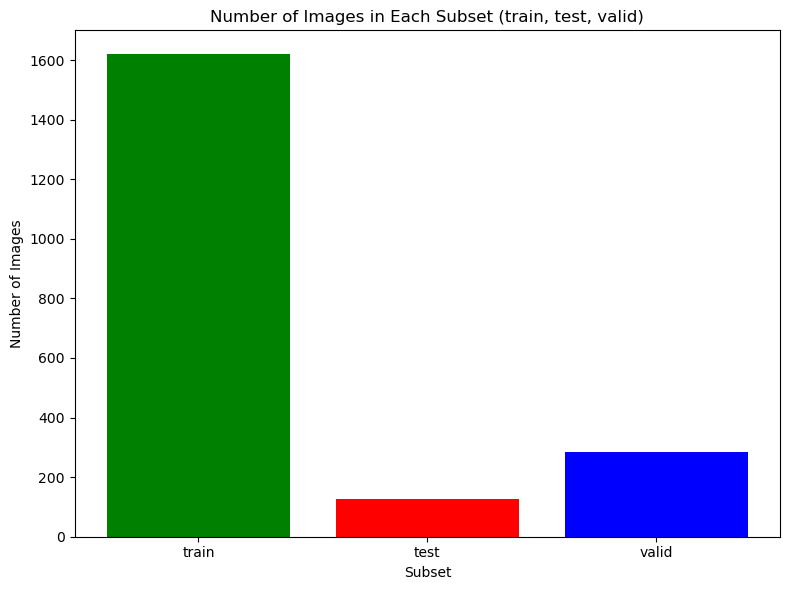

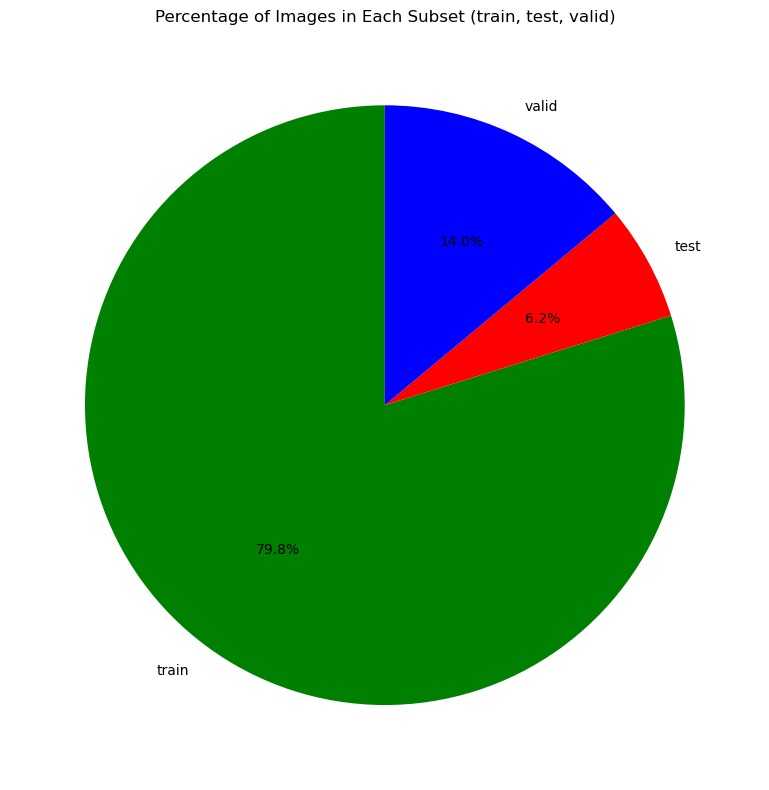

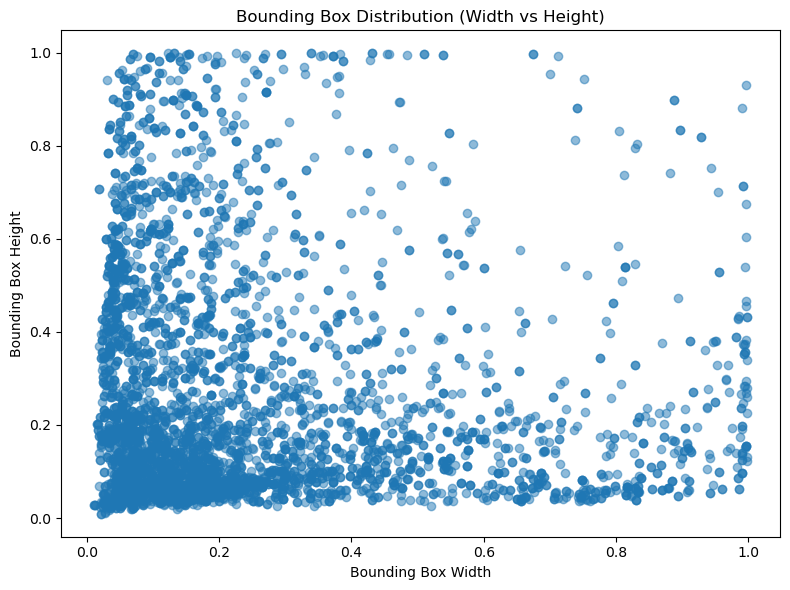

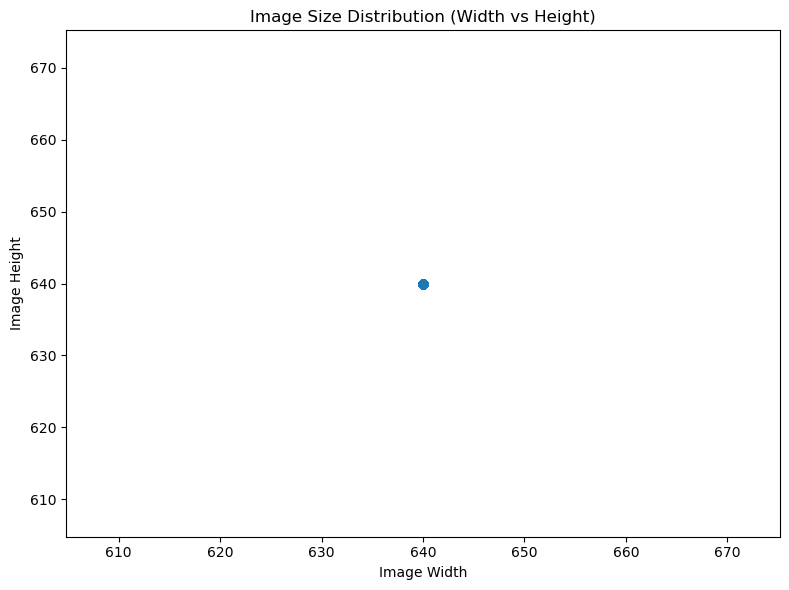

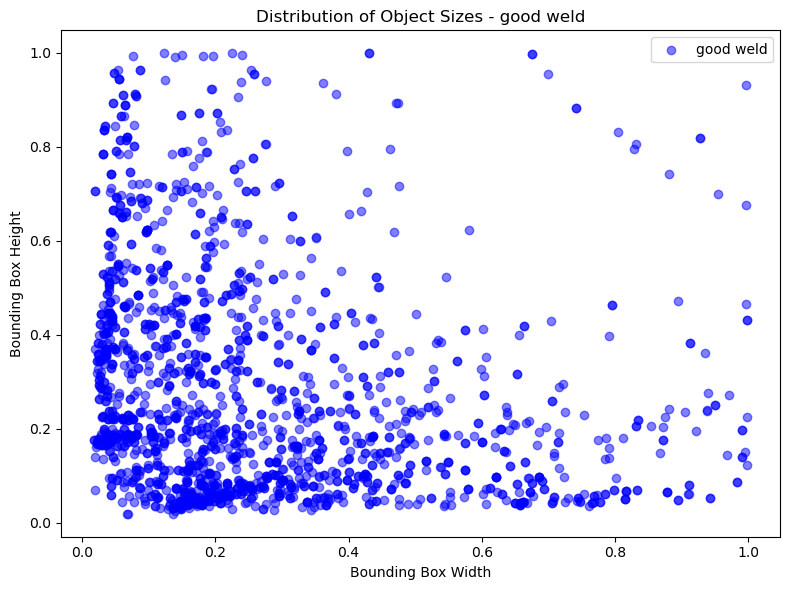

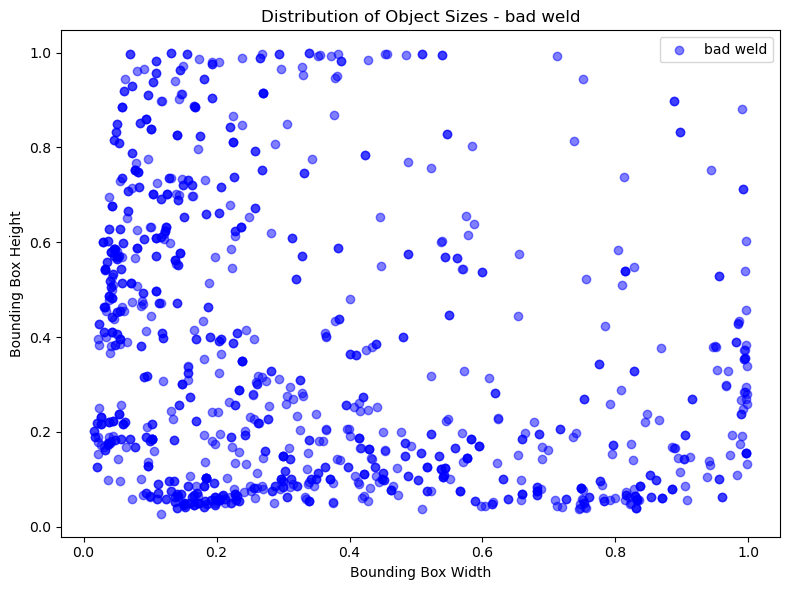

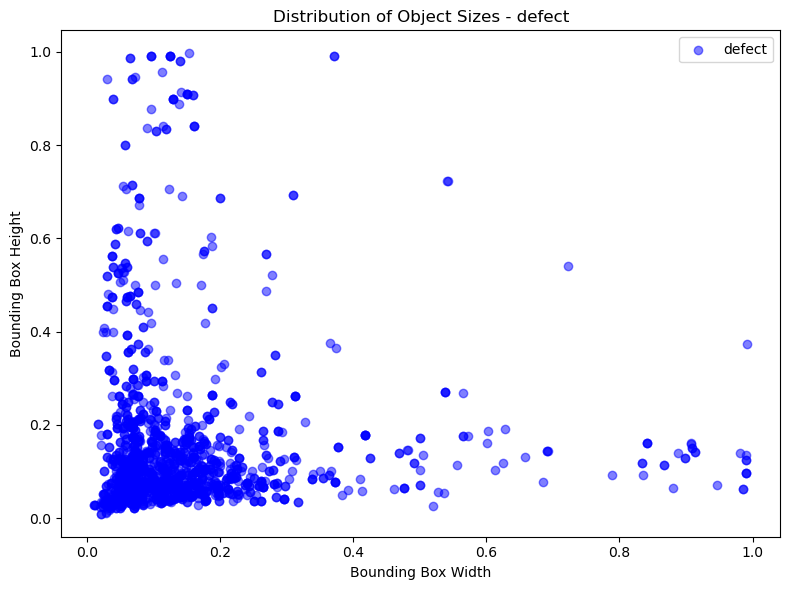

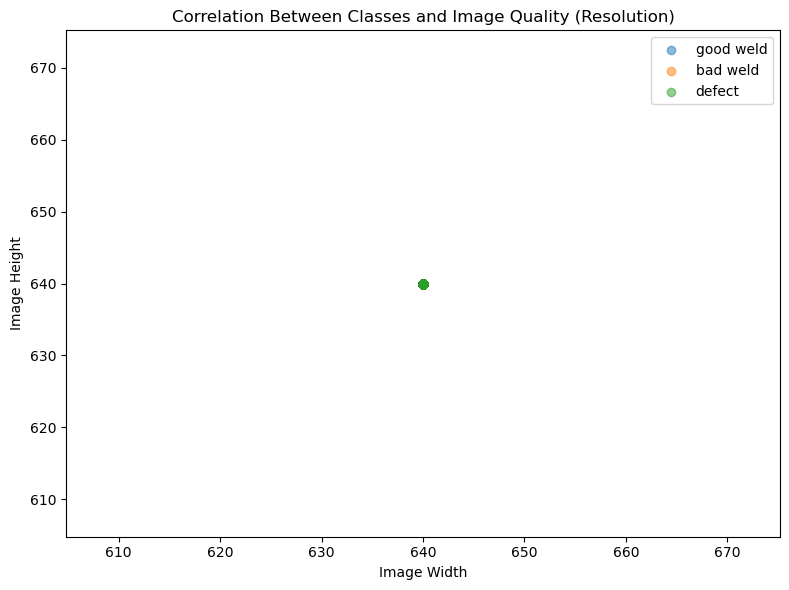

In [15]:
image_folder = os.path.join(dataset_path, 'train', 'images')
label_folder = os.path.join(dataset_path, 'train', 'labels')


analyze_dataset(dataset_path)
plot_image_distribution(dataset_path)
plot_bbox_distribution(label_folder)  
plot_image_size_distribution(image_folder) 
plot_classwise_bbox_size_distribution(label_folder) 
plot_class_vs_image_quality(image_folder, label_folder)  